#

In [4]:
%pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 653.6 kB/s eta 0:00:01
   ------------------- -------------------- 122.9/250.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.5 MB/s eta 0:00:00


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

In [6]:
import pandas as pd
data_np = pd.read_excel(
    "doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)

In [7]:
test_data = {
    "City A": [14.1, 14.1, 13.7],
    "City B": [11.0, 12.6, 12.1],
}


# Original dataframe
test_df = pd.DataFrame.from_dict(test_data)
# A copy of the dataframe
test_copy = test_df.copy()
# A pointer to the dataframe
test_pointer = test_df


test_pointer.iloc[1, 1] = 99

In [8]:
print("test_df=")
print(f"{test_df}\n")
print("test_copy=")
print(f"{test_copy}\n")

test_df=
   City A  City B
0    14.1    11.0
1    14.1    99.0
2    13.7    12.1

test_copy=
   City A  City B
0    14.1    11.0
1    14.1    12.6
2    13.7    12.1


In [10]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB

In [11]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [13]:
import numpy as np
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_6228\527227325.py:3: FutureWarning: The provided callable <function mean at 0x0000015DF87DB060> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)

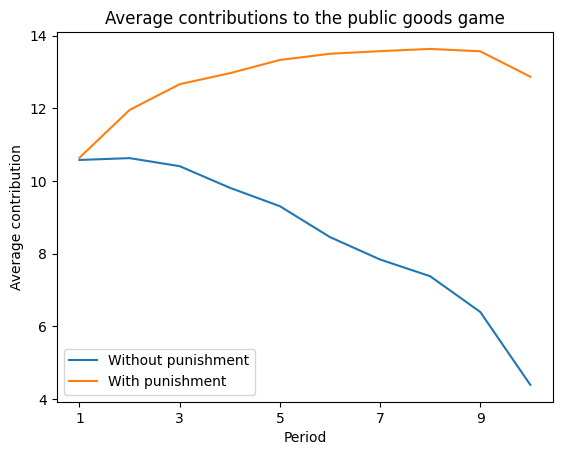

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

question:Describe any differences and similarities you see in the mean
contribution over time in both experiments answer:From the chart,we can
see that the trend of the blue line(the experiment without
punishment)goes down obviously during each period.However the trend of
orange line(the experiment with punishment)goes up slowly.They start
from the same point.But they goes differently.

In [16]:
partial_names_list = ["F. Kennedy", "Lennon", "Maynard Keynes", "Wayne"]
["John " + name for name in partial_names_list]

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

In [17]:
['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

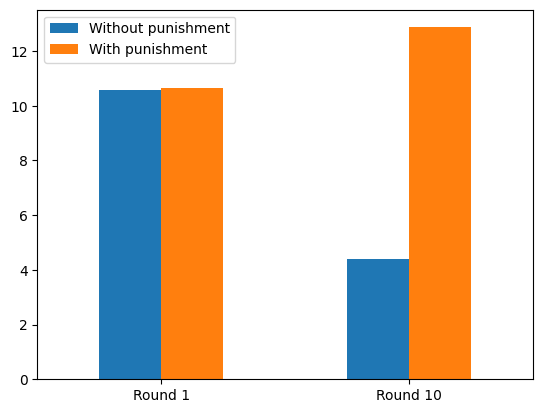

In [18]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

question:explain whether this means that the two sets of data are the
same. answer:No,although the mean contribution for both experiments was
10.6 in Period 1,but in round 10,the mean contribution is totally
different.The data from experiment with punishment is much higher than
that from experiment without punishment.

In [19]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

In [20]:
p_c = data_p.agg(["std", "var", "mean"], 1)

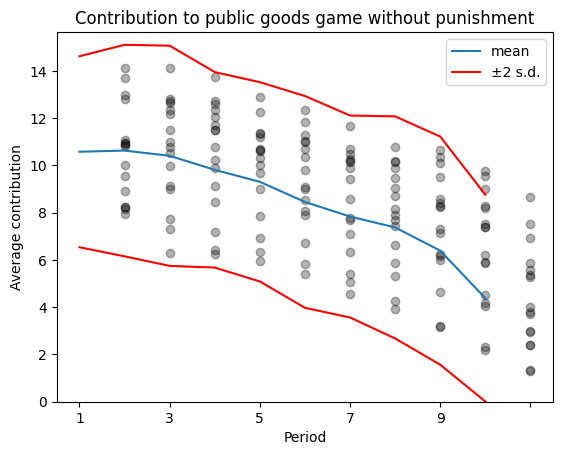

In [21]:
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

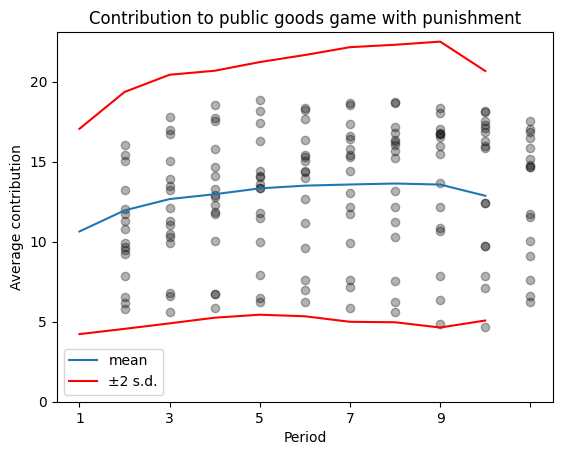

In [23]:
fig, ax = plt.subplots()
p_c["mean"].plot(ax=ax, label="mean")
# mean + 2 sd
(p_c["mean"] + 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 sd
(p_c["mean"] - 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_p.columns)):
    ax.scatter(x=data_p.index, y=data_p.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game with punishment")
plt.show();

In [24]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1     10.199675
2     12.185065
3     12.689935
4     12.625000
5     12.140375
6     12.827541
7     13.098931
8     13.482621
9     13.496754
10    11.307360
dtype: float64

In [25]:
# A lambda function accepting three inputs, a, b, and c, and calculating the sum of the squares
test_function = lambda a, b, c: a**2 + b**2 + c**2


# Now we apply the function by handing over (in parenthesis) the following inputs: a=3, b=4 and c=5
test_function(3, 4, 5)

50

In [26]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)

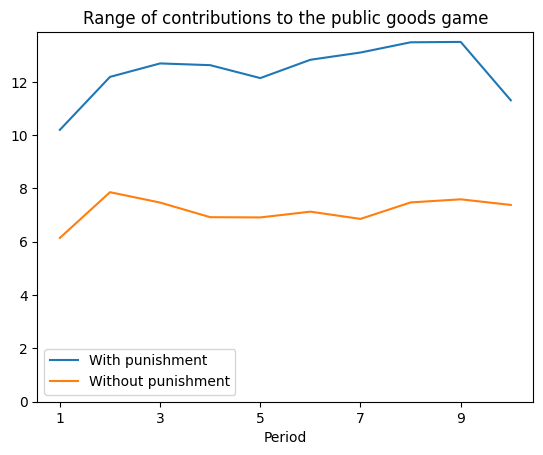

In [27]:
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show();

In [28]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [29]:
summ_n.loc[[1, 10], :].round(2)

In [30]:
summ_p.loc[[1, 10], :].round(2)

question:Comment on any similarities and differences in the
distributions, both across time and across experiments
answer:similarities:the statistics vary in different periods and
different experiments differences:in experiment with punishment,the data
is always going up,data from petiod 10 is always higher than that in
period 1 but in experiment without punishment,the data from petiod 10 is
not always higher than that in period 1

In [32]:
import pingouin as pg
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :])

In [33]:
pg.ttest(x=data_n.iloc[0, :], y=data_p.iloc[0, :], paired=True)

question:What does this p-value tell us about the difference in means in
Period 1? answer:This result of the previous one delivers a p-value of
0.9496. This means it is very likely that the assumption that there are
no differences in the populations is likely to be true.In the latter
one,The p-value becomes smaller as we can attribute more of the
differences to the ‘with punishment’ treatment, but the p-value is still
very large (0.8828), so we still conclude that the differences in Period
1 are likely to be due to chance.